# Data Preprocessing

In [2]:
# Imports 
# open folder
from os import makedirs
from os import listdir
import os
from shutil import copyfile

# open image
import cv2
from PIL import Image

# random 
from random import seed
from random import random

# basic
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# image augmentation
import albumentations as A

In [3]:
import os
import shutil
from random import shuffle

In [28]:
# Define the paths
original_dataset_path = r'C:\Users\HP\Desktop\Data\poultry_disease_detection_third_iteration\poultry_data'
train_path = r"C:\Users\HP\Desktop\Data\poultry_disease_detection_third_iteration\Train"
validation_path = r"C:\Users\HP\Desktop\Data\poultry_disease_detection_third_iteration\Validate"
test_path = r"C:\Users\HP\Desktop\Data\poultry_disease_detection_third_iteration\Test"

In [5]:
# Split each class folder
classes = ['Coccidiosis', 'Salmonella', 'Newcastle diseases', 'Healthy poultry']

# Separate block for displaying the number of files in each class for the original dataset
print("\nNumber of files in each class for the original dataset:")
for class_name in classes:
    class_original = os.path.join(original_dataset_path, class_name)
    print(f"{class_name}: {len(os.listdir(class_original))} files")



Number of files in each class for the original dataset:
Coccidiosis: 2103 files
Salmonella: 2276 files
Newcastle diseases: 376 files
Healthy poultry: 2057 files


## Image Augmentation

In [6]:
# image augmentation flip horizontal(mirror) image 
transform_flip = A.Compose([A.HorizontalFlip(always_apply=True)])

In [7]:
# image augmentation rotation image 45 degree angle, rescale 10% and shift 0.062%
transform_shift = A.Compose([A.ShiftScaleRotate(shift_limit=(0.0625, 0.0625), 
                                                scale_limit=(0.1, 0.1), 
                                                rotate_limit=(45, 45),
                                                p=1.0)])

In [8]:
# image augmentation add gaussian noise and decrease brightness
transform_noise = A.Compose([A.GaussNoise(var_limit=(100,200),
                                         mean=-30,
                                         p=1.0)])

In [9]:
# Image augmentation - Flip vertically
transform_flip_vertical = A.Compose([A.VerticalFlip(always_apply=True)])

In [10]:
# Image augmentation - Random Flip (mirror) along both axes
# transform_flip_random = A.Compose([A.RandomFlip(always_apply=True)])

In [14]:
# Define the shearing transformation
transform_color = A.Compose([A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2, p=1.0)])

In [15]:
# # Image augmentation - Crop a random area
# transform_crop = A.Compose([A.RandomCrop(width=100, height=100)])

In [16]:
# Image augmentation - Resize
transform_resize = A.Compose([A.Resize(width=200, height=200)])

In [17]:
# Image augmentation - Zoom
transform_zoom = A.Compose([A.ShiftScaleRotate(scale_limit=(0.5, 2), p=1.0)])

In [18]:
# Image augmentation - Skew
transform_skew = A.Compose([A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=1.0)])

In [19]:
# open sample image data
image = cv2.imread(r"C:\Users\HP\Desktop\Data\poultry_disease_detection_third_iteration\poultry_data\Coccidiosis\cocci.57.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert to pixel numpy array

In [20]:
transformed_flip = transform_flip(image=image)['image']
transformed_shift = transform_shift(image=image)['image']
transformed_noise = transform_noise(image=image)['image']
transformed_zoom = transform_zoom(image=image)['image']
transformed_skew = transform_skew(image=image)['image']
transformed_resize = transform_resize(image=image)['image']
transformed_color = transform_color(image=image)['image']
# transformed_flip_random = transform_flip_random(image=image)['image']
transformed_flip_vertical = transform_flip_vertical(image=image)['image']

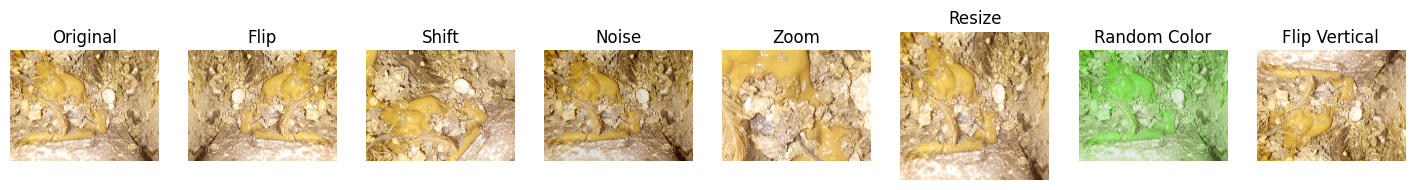

In [21]:
import matplotlib.pyplot as plt

# Assuming you have the following images: image, transformed_flip, transformed_shift, transformed_noise, transformed_zoom, transformed_skew

# Set the figure size for all images
fig, axes = plt.subplots(1, 8, figsize=(18, 3))  # Adjust the number of subplots to match the number of images

# Display the original image
axes[0].imshow(image)
axes[0].set_title("Original", size=12)
axes[0].axis("off")

# Display the transformed images
images = [transformed_flip, transformed_shift, transformed_noise, transformed_zoom, transformed_resize, transformed_color, transformed_flip_vertical]
titles = ["Flip", "Shift", "Noise", "Zoom", "Resize", "Random Color", "Flip Vertical"]

for i, (img, title) in enumerate(zip(images, titles), start=1):
    axes[i].imshow(img)
    axes[i].set_title(title, size=12)
    axes[i].axis("off")

plt.show()

### Uniform Class Distribution

In [22]:
import cv2
from os import listdir
import os

src_directory = r"C:\Users\HP\Desktop\Data\poultry_disease_detection_third_iteration\poultry_data\Newcastle diseases"

# Loop through each file in the directory
for file in sorted(listdir(src_directory)):
    try:
        # Construct the full file path using os.path.join
        file_path = os.path.join(src_directory, file)

        # Read the image
        image = cv2.imread(file_path)
        
        if image is None:
            raise Exception(f"Error: Unable to read image file '{file}'")

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Apply transformations
        transformed_flip = transform_flip(image=image)['image']
        transformed_shift = transform_shift(image=image)['image']
        transformed_noise = transform_noise(image=image)['image']
        transformed_zoom = transform_zoom(image=image)['image']
        transformed_flip_vertical = transform_flip_vertical(image=image)['image']
        # transformed_crop = transform_crop(image=image)['image']
        # transformed_distortion = transform_distortion(image=image)['image']
        
        # Save augmented images with different filenames
        cv2.imwrite(os.path.join(src_directory, file[:-4] + "_flip.jpg"), cv2.cvtColor(transformed_flip, cv2.COLOR_RGB2BGR))
        cv2.imwrite(os.path.join(src_directory, file[:-4] + "_shift.jpg"), cv2.cvtColor(transformed_shift, cv2.COLOR_RGB2BGR))
        cv2.imwrite(os.path.join(src_directory, file[:-4] + "_noise.jpg"), cv2.cvtColor(transformed_noise, cv2.COLOR_RGB2BGR))
        cv2.imwrite(os.path.join(src_directory, file[:-4] + "_zoom.jpg"), cv2.cvtColor(transformed_zoom, cv2.COLOR_RGB2BGR))
        cv2.imwrite(os.path.join(src_directory, file[:-4] + "_verticalflip.jpg"), cv2.cvtColor(transformed_flip_vertical, cv2.COLOR_RGB2BGR))
        # cv2.imwrite(os.path.join(src_directory, file[:-4] + "_disortion.jpg"), cv2.cvtColor(transformed_distortion, cv2.COLOR_RGB2BGR))
    
    except Exception as e:
        print(f"Error processing file '{file}': {e}")


In [23]:
# Separate block for displaying the number of files in each class for the original dataset
print("\nNumber of files in each class for the original dataset:")
for class_name in classes:
    class_original = os.path.join(original_dataset_path, class_name)
    print(f"{class_name}: {len(os.listdir(class_original))} files")



Number of files in each class for the original dataset:
Coccidiosis: 2103 files
Salmonella: 2276 files
Newcastle diseases: 2256 files
Healthy poultry: 2057 files


## Increase size of Dataset

In [24]:
# Coccidiosis
import cv2
from os import listdir
import os

src_directory = r"C:\Users\HP\Desktop\Data\poultry_disease_detection_third_iteration\poultry_data\Coccidiosis"

# Loop through each file in the directory
for file in sorted(listdir(src_directory)):
    try:
        # Construct the full file path using os.path.join
        file_path = os.path.join(src_directory, file)

        # Read the image
        image = cv2.imread(file_path)
        
        if image is None:
            raise Exception(f"Error: Unable to read image file '{file}'")

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Apply transformations
        transformed_noise = transform_noise(image=image)['image']
        
        # Save augmented images with different filenames
        cv2.imwrite(os.path.join(src_directory, file[:-4] + "_noise.jpg"), cv2.cvtColor(transformed_noise, cv2.COLOR_RGB2BGR))
    
    except Exception as e:
        print(f"Error processing file '{file}': {e}")


In [25]:
# Healthy Poultry
import cv2
from os import listdir
import os

src_directory = r"C:\Users\HP\Desktop\Data\poultry_disease_detection_third_iteration\poultry_data\Healthy poultry"

# Loop through each file in the directory
for file in sorted(listdir(src_directory)):
    try:
        # Construct the full file path using os.path.join
        file_path = os.path.join(src_directory, file)

        # Read the image
        image = cv2.imread(file_path)
        
        if image is None:
            raise Exception(f"Error: Unable to read image file '{file}'")

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Apply transformations
        transformed_noise = transform_noise(image=image)['image']
        
        # Save augmented images with different filenames
        cv2.imwrite(os.path.join(src_directory, file[:-4] + "_noise.jpg"), cv2.cvtColor(transformed_noise, cv2.COLOR_RGB2BGR))
    
    except Exception as e:
        print(f"Error processing file '{file}': {e}")


In [26]:
# Salmonella
import cv2
from os import listdir
import os

src_directory = r"C:\Users\HP\Desktop\Data\poultry_disease_detection_third_iteration\poultry_data\Salmonella"

# Loop through each file in the directory
for file in sorted(listdir(src_directory)):
    try:
        # Construct the full file path using os.path.join
        file_path = os.path.join(src_directory, file)

        # Read the image
        image = cv2.imread(file_path)
        
        if image is None:
            raise Exception(f"Error: Unable to read image file '{file}'")

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Apply transformations
        transformed_noise = transform_noise(image=image)['image']
        
        # Save augmented images with different filenames
        cv2.imwrite(os.path.join(src_directory, file[:-4] + "_noise.jpg"), cv2.cvtColor(transformed_noise, cv2.COLOR_RGB2BGR))
    
    except Exception as e:
        print(f"Error processing file '{file}': {e}")


In [27]:
# NewCastle Disease
import cv2
from os import listdir
import os

src_directory = r"C:\Users\HP\Desktop\Data\poultry_disease_detection_third_iteration\poultry_data\Newcastle diseases"

# Loop through each file in the directory
for file in sorted(listdir(src_directory)):
    try:
        # Construct the full file path using os.path.join
        file_path = os.path.join(src_directory, file)

        # Read the image
        image = cv2.imread(file_path)
        
        if image is None:
            raise Exception(f"Error: Unable to read image file '{file}'")

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Apply transformations
        transformed_skew = transform_skew(image=image)['image']
        
        # Save augmented images with different filenames
        cv2.imwrite(os.path.join(src_directory, file[:-4] + "_skew.jpg"), cv2.cvtColor(transformed_skew, cv2.COLOR_RGB2BGR))
    
    except Exception as e:
        print(f"Error processing file '{file}': {e}")


In [36]:
# Separate block for displaying the number of files in each class for the original dataset
print("\nNumber of files in each class for the original dataset:")
for class_name in classes:
    class_original = os.path.join(original_dataset_path, class_name)
    print(f"{class_name}: {len(os.listdir(class_original))} files")



Number of files in each class for the original dataset:
Coccidiosis: 4206 files
Salmonella: 4552 files
Newcastle diseases: 4512 files
Healthy poultry: 4114 files


### Divide Data into Test, Train, Validate

In [29]:
# Create directories if they don't exist
os.makedirs(train_path, exist_ok=True)
os.makedirs(validation_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

In [30]:
# Define the split ratios
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

In [31]:
# Function to split the dataset
def split_dataset(source, train, validation, test, ratio):
    files = os.listdir(source)
    shuffle(files)

    # Calculate the split indices
    train_split = int(len(files) * ratio[0])
    validation_split = int(len(files) * (ratio[0] + ratio[1]))

    # Copy files to respective directories
    for file in files[:train_split]:
        shutil.copy(os.path.join(source, file), os.path.join(train, file))

    for file in files[train_split:validation_split]:
        shutil.copy(os.path.join(source, file), os.path.join(validation, file))

    for file in files[validation_split:]:
        shutil.copy(os.path.join(source, file), os.path.join(test, file))


In [32]:
for class_name in classes:
    class_source = os.path.join(original_dataset_path, class_name)
    class_train = os.path.join(train_path, class_name)
    class_validation = os.path.join(validation_path, class_name)
    class_test = os.path.join(test_path, class_name)

    os.makedirs(class_train, exist_ok=True)
    os.makedirs(class_validation, exist_ok=True)
    os.makedirs(class_test, exist_ok=True)

    split_dataset(class_source, class_train, class_validation, class_test, [train_ratio, validation_ratio, test_ratio])

print("Dataset splitting is complete.")


Dataset splitting is complete.


#### Visualize data in Train, Test, Validate

In [33]:
# Separate block for displaying the number of files in each class for training
print("\nNumber of files in each class for the training set:")
for class_name in classes:
    class_train = os.path.join(train_path, class_name)
    print(f"{class_name}: {len(os.listdir(class_train))} files")


Number of files in each class for the training set:
Coccidiosis: 3364 files
Salmonella: 3641 files
Newcastle diseases: 3609 files
Healthy poultry: 3291 files


In [34]:
# Separate block for displaying the number of files in each class for validation
print("\nNumber of files in each class for the validation set:")
for class_name in classes:
    class_validation = os.path.join(validation_path, class_name)
    print(f"{class_name}: {len(os.listdir(class_validation))} files")



Number of files in each class for the validation set:
Coccidiosis: 421 files
Salmonella: 455 files
Newcastle diseases: 451 files
Healthy poultry: 411 files


In [35]:
# Separate block for displaying the number of files in each class for test
print("\nNumber of files in each class for the test set:")
for class_name in classes:
    class_test = os.path.join(test_path, class_name)
    print(f"{class_name}: {len(os.listdir(class_test))} files")


Number of files in each class for the test set:
Coccidiosis: 421 files
Salmonella: 456 files
Newcastle diseases: 452 files
Healthy poultry: 412 files
